In [1]:
# 1. Instalamos las librerías necesarias
!pip install ultralytics roboflow

# Importamos librerías para mostrar imágenes más tarde
from IPython.display import Image, display
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 104.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [2]:
# 2. Descarga del Dataset desde Roboflow
from roboflow import Roboflow

# --- PEGA AQUÍ TU CÓDIGO DE ROBOFLOW ---
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ywUfSAbIZrZIcTHIzOwa")
project = rf.workspace("ecobot-kkoux").project("ecobot-jyayn")
version = project.version(3)
dataset = version.download("yolov8")


# Guardamos la ruta del archivo data.yaml que se descarga
# Roboflow suele guardar todo en una carpeta con el nombre del proyecto
import glob
yaml_path = glob.glob("*/data.yaml")[0] # Busca automáticamente el archivo de configuración
print(f"Dataset configurado en: {yaml_path}")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Ecobot-3 in yolov8:: 100%|██████████| 5680/5680 [00:00<00:00, 8867.50it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Dataset configurado en: Ecobot-3/data.yaml


In [3]:
# 3. Entrenamiento del Modelo YOLOv8 Medium
from ultralytics import YOLO

# Cargamos el modelo pre-entrenado Medium (la 'm' es la clave)
model = YOLO('yolov8m.pt')

# Iniciamos el entrenamiento
# data=yaml_path: Le dice dónde están tus fotos de Ecobot
# project='Ecobot_Project': Crea una carpeta ordenada con tus resultados
results = model.train(
    data=yaml_path,
    epochs=50,
    imgsz=640,
    name='yolov8m_ecobot_run',
    project='Ecobot_Training'
)

Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Ecobot-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8m_ecobot_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

In [ ]:
# 3.5. Calcular métricas adicionales (Accuracy, Precision, Recall)
from ultralytics import YOLO

# Cargar el mejor modelo entrenado
model = YOLO('/content/Ecobot_Training/yolov8m_ecobot_run/weights/best.pt')

# Validar el modelo y obtener métricas detalladas
results = model.val(data=yaml_path)

# Mostrar métricas por clase
print("\n" + "="*50)
print("MÉTRICAS DETALLADAS POR CLASE")
print("="*50)

# Nombres de las clases (ajusta según tu dataset)
class_names = ['Botellita', 'Lata', 'Pet', 'Tetra']

# Mostrar métricas por cada clase
for i, name in enumerate(class_names):
    precision = results.box.p[i]  # Precision de la clase i
    recall = results.box.r[i]     # Recall de la clase i
    accuracy_approx = (precision + recall) / 2  # Aproximación de accuracy

    print(f"\nClase: {name}")
    print(f"  Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"  Recall:    {recall:.4f} ({recall*100:.2f}%)")
    print(f"  Accuracy aprox: {accuracy_approx:.4f} ({accuracy_approx*100:.2f}%)")

# Métricas globales
print("\n" + "="*50)
print("MÉTRICAS GLOBALES")
print("="*50)
print(f"Precision promedio:  {results.box.p.mean():.4f} ({results.box.p.mean()*100:.2f}%)")
print(f"Recall promedio:     {results.box.r.mean():.4f} ({results.box.r.mean()*100:.2f}%)")
print(f"mAP50:               {results.box.map50:.4f} ({results.box.map50*100:.2f}%)")
print(f"mAP50-95:            {results.box.map:.4f} ({results.box.map*100:.2f}%)")

# Aproximación de Accuracy global
avg_accuracy = (results.box.p.mean() + results.box.r.mean()) / 2
print(f"\nAccuracy aproximado: {avg_accuracy:.4f} ({avg_accuracy*100:.2f}%)")
print("="*50)

Mostrando Matriz de Confusión:


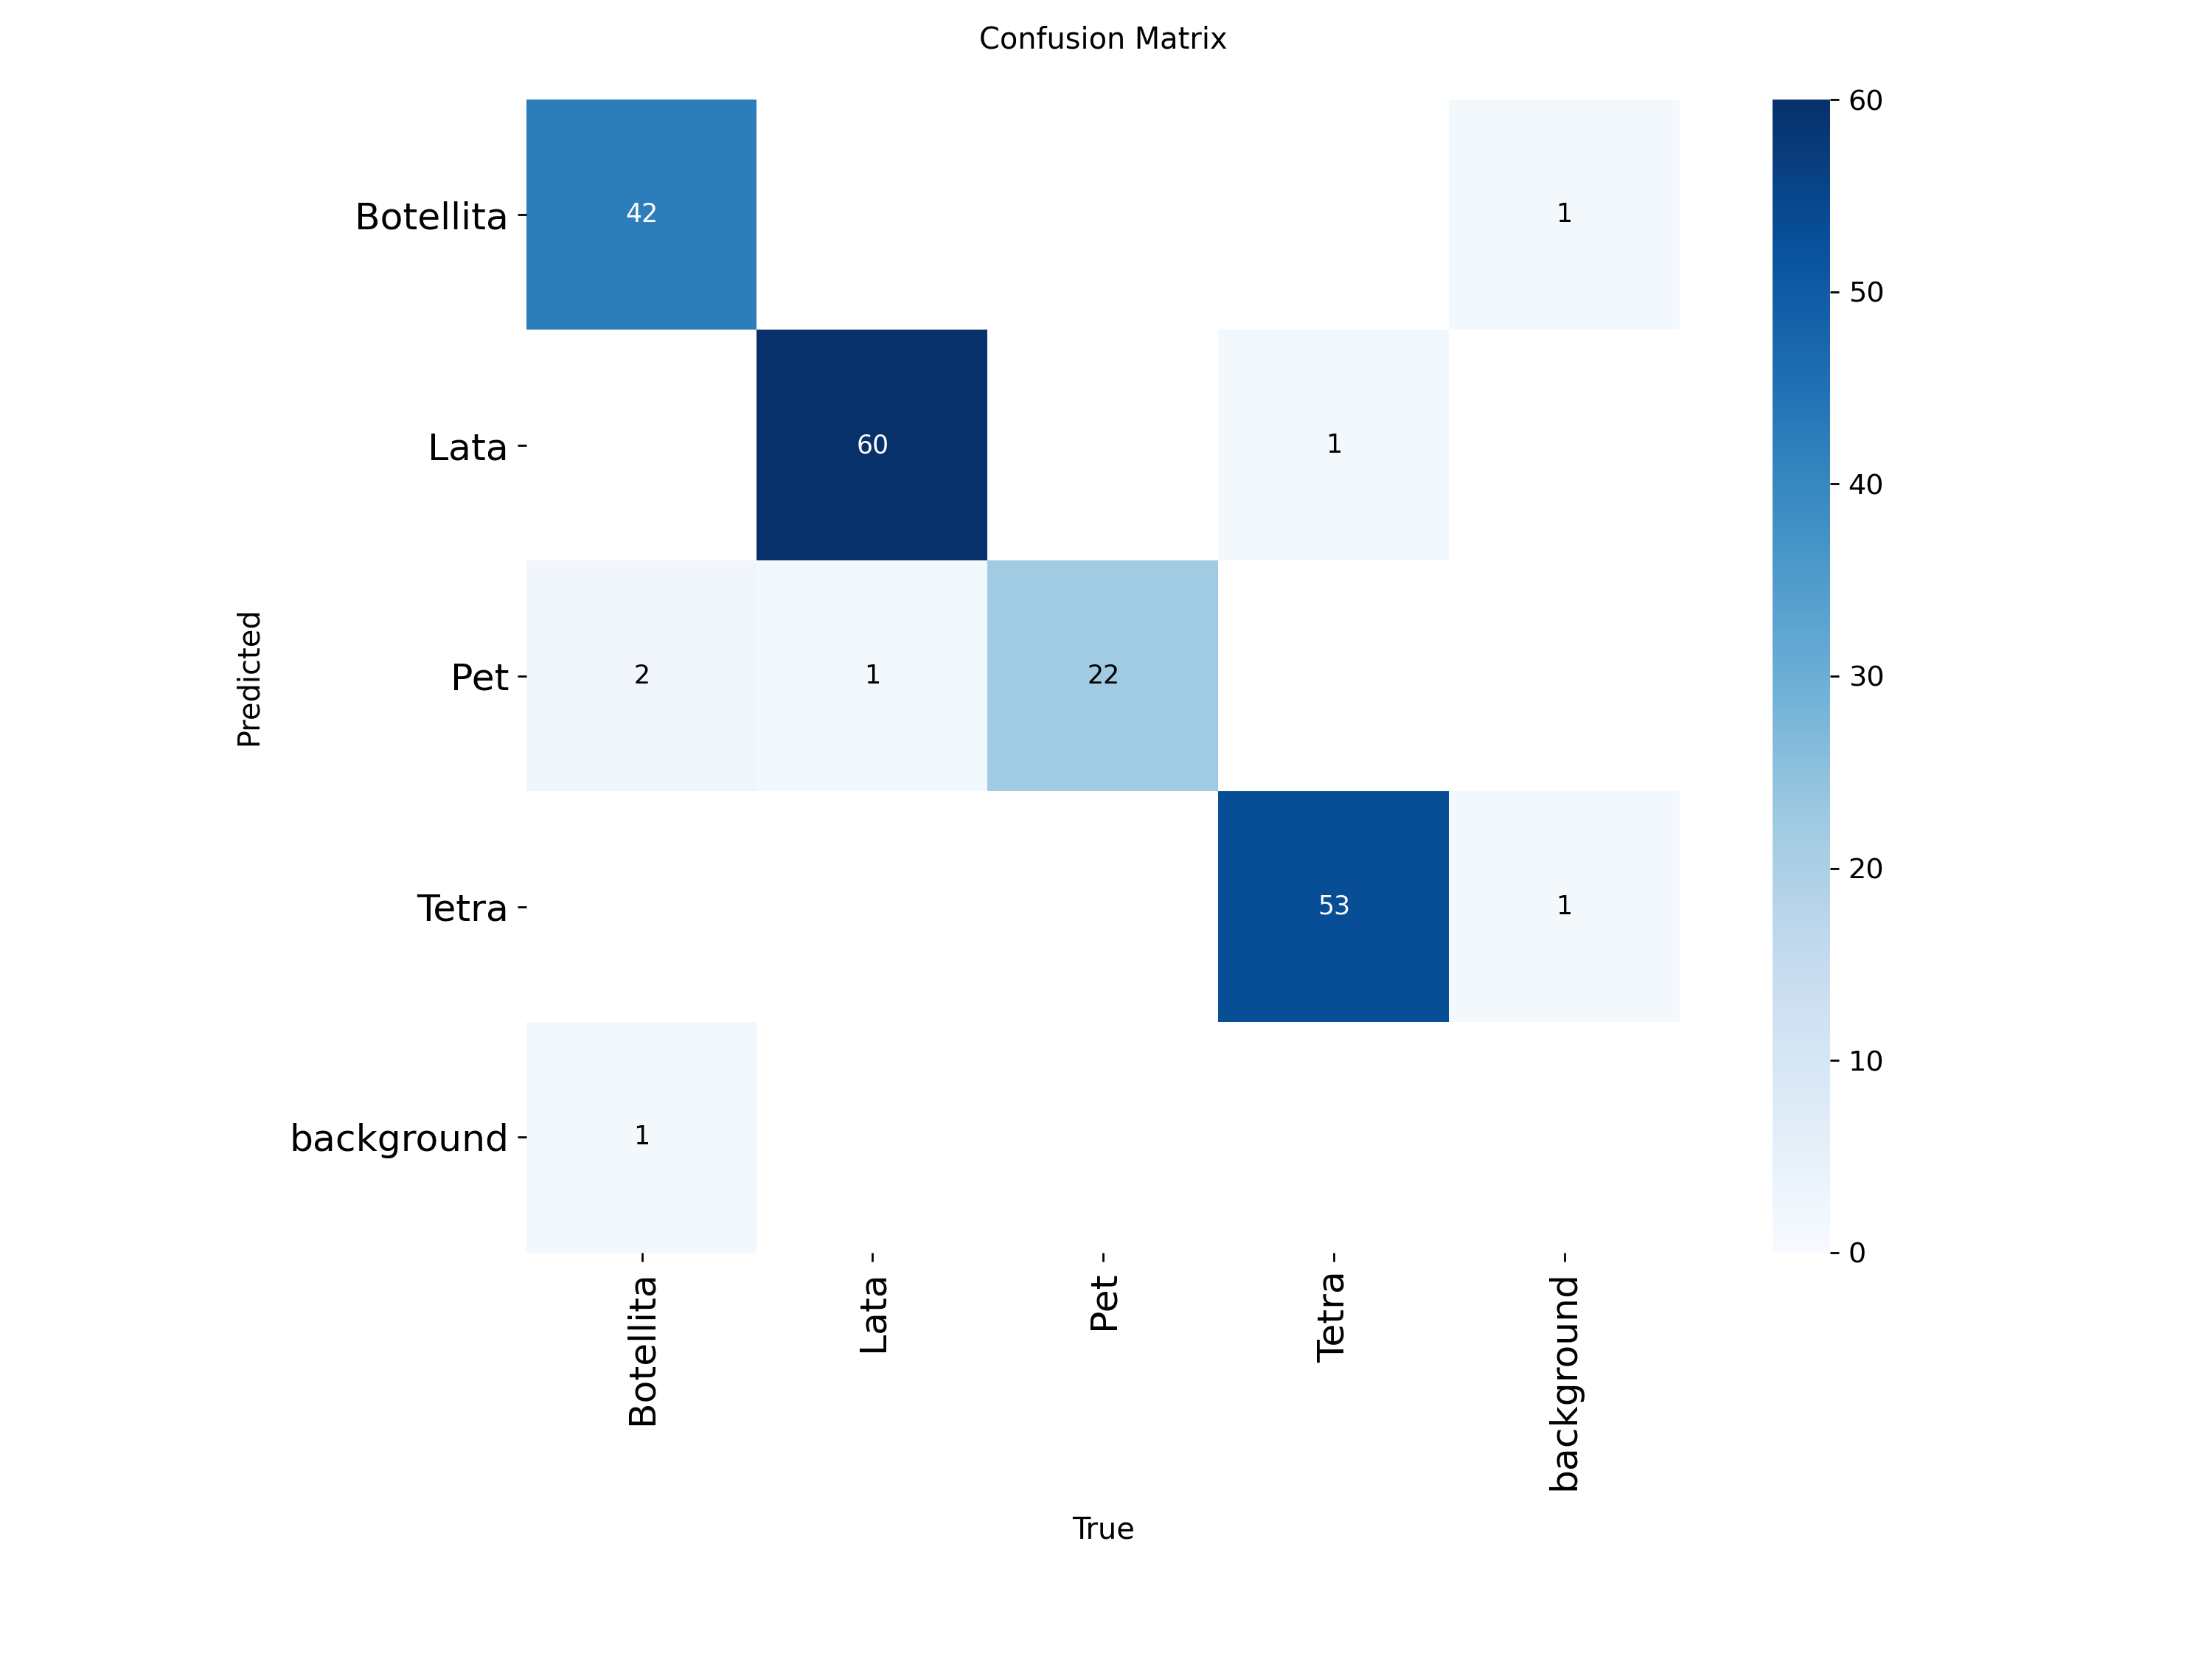

In [ ]:
# 4. Visualizar la Matriz de Confusión
# Buscamos la imagen generada automáticamente en la carpeta de entrenamiento
confusion_matrix_path = glob.glob("Ecobot_Training/yolov8m_ecobot_run*/confusion_matrix.png")[0]

print("Mostrando Matriz de Confusión:")
display(Image(filename=confusion_matrix_path, width=800))

In [ ]:
# 5. Exportar a ONNX para implementación en Hardware
success = model.export(format='onnx')

print(f"Modelo exportado exitosamente: {success}")
# El archivo .onnx quedará en la misma carpeta que el best.pt

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/content/Ecobot_Training/yolov8m_ecobot_run/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (49.6 MB)

ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.74...
ONNX: export success ✅ 5.5s, saved as '/content/Ecobot_Training/yolov8m_ecobot_run/weights/best.onnx' (98.8 MB)

Export complete (7.5s)
Results saved to /content/Ecobot_Training/yolov8m_ecobot_run/weights
Predict:         yolo predict task=detect model=/content/Ecobot_Training/yolov8m_ecobot_run/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/Ecobot_Training/yolov8m_ecobot_run/weights/best.onnx imgsz=640 data=Ecobot-3/data.yaml  
Visualize:       https://netron.app
Modelo exportado exitosamente: /content/Ecobot_Training/yolov8m_ecob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')